In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_beer1=pd.read_csv("Consumo_cerveja.csv")
df_beer1.head()

Data  Temperatura Media (C)  Temperatura Minima (C)  \
0  01-01-2015                  27.30                    23.9   
1  02-01-2015                  27.02                    24.5   
2  03-01-2015                  24.82                    22.4   
3  04-01-2015                  23.98                    21.5   
4  05-01-2015                  23.82                    21.0   

   Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
0                    32.5                0.0                0   
1                    33.5                0.0                0   
2                    29.9                0.0                1   
3                    28.6                1.2                1   
4                    28.3                0.0                0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900

In [3]:
df_beer1.shape

(365, 7)

In [5]:
## Renaming the column names
df_beer1.rename(columns={'Data':'Date'},inplace=True)
df_beer1.rename(columns={'Temperatura Media (C)':'MedTemp'},inplace=True)
df_beer1.rename(columns={'Temperatura Minima (C)':'MinTemp'},inplace=True)
df_beer1.rename(columns={'Temperatura Maxima (C)':'MaxTemp'},inplace=True)
df_beer1.rename(columns={'Precipitacao (mm)':'Precipitation'},inplace=True)
df_beer1.rename(columns={'Final de Semana':'EndofWeek'},inplace=True)
df_beer1.rename(columns={'Consumo de cerveja (litros)':'Beerconsumption'},inplace=True)

In [6]:
df_beer1.head()

Date  MedTemp  MinTemp  MaxTemp  Precipitation  EndofWeek  \
0  01-01-2015    27.30     23.9     32.5            0.0          0   
1  02-01-2015    27.02     24.5     33.5            0.0          0   
2  03-01-2015    24.82     22.4     29.9            0.0          1   
3  04-01-2015    23.98     21.5     28.6            1.2          1   
4  05-01-2015    23.82     21.0     28.3            0.0          0   

   Beerconsumption  
0           25.461  
1           28.972  
2           30.814  
3           29.799  
4           28.900

In [7]:
### The Date column is of no use in the model building hence we drop it 

df_beer1.drop(['Date'],axis=1,inplace=True)

In [8]:
df_beer1.isnull().sum()

MedTemp            0
MinTemp            0
MaxTemp            0
Precipitation      0
EndofWeek          0
Beerconsumption    0
dtype: int64

In [9]:
df_beer1.describe()

MedTemp     MinTemp     MaxTemp  Precipitation   EndofWeek  \
count  365.000000  365.000000  365.000000     365.000000  365.000000   
mean    21.226356   17.461370   26.611507       5.196712    0.284932   
std      3.180108    2.826185    4.317366      12.417844    0.452001   
min     12.900000   10.600000   14.500000       0.000000    0.000000   
25%     19.020000   15.300000   23.800000       0.000000    0.000000   
50%     21.380000   17.900000   26.900000       0.000000    0.000000   
75%     23.280000   19.600000   29.400000       3.200000    1.000000   
max     28.860000   24.500000   36.500000      94.800000    1.000000   

       Beerconsumption  
count       365.000000  
mean         25.401367  
std           4.399143  
min          14.343000  
25%          22.008000  
50%          24.867000  
75%          28.631000  
max          37.937000

In [10]:
df_beer1.corr()

MedTemp   MinTemp   MaxTemp  Precipitation  EndofWeek  \
MedTemp          1.000000  0.862752  0.922513       0.024416  -0.050803   
MinTemp          0.862752  1.000000  0.672929       0.098625  -0.059534   
MaxTemp          0.922513  0.672929  1.000000      -0.049305  -0.040258   
Precipitation    0.024416  0.098625 -0.049305       1.000000   0.001587   
EndofWeek       -0.050803 -0.059534 -0.040258       0.001587   1.000000   
Beerconsumption  0.574615  0.392509  0.642672      -0.193784   0.505981   

                 Beerconsumption  
MedTemp                 0.574615  
MinTemp                 0.392509  
MaxTemp                 0.642672  
Precipitation          -0.193784  
EndofWeek               0.505981  
Beerconsumption         1.000000

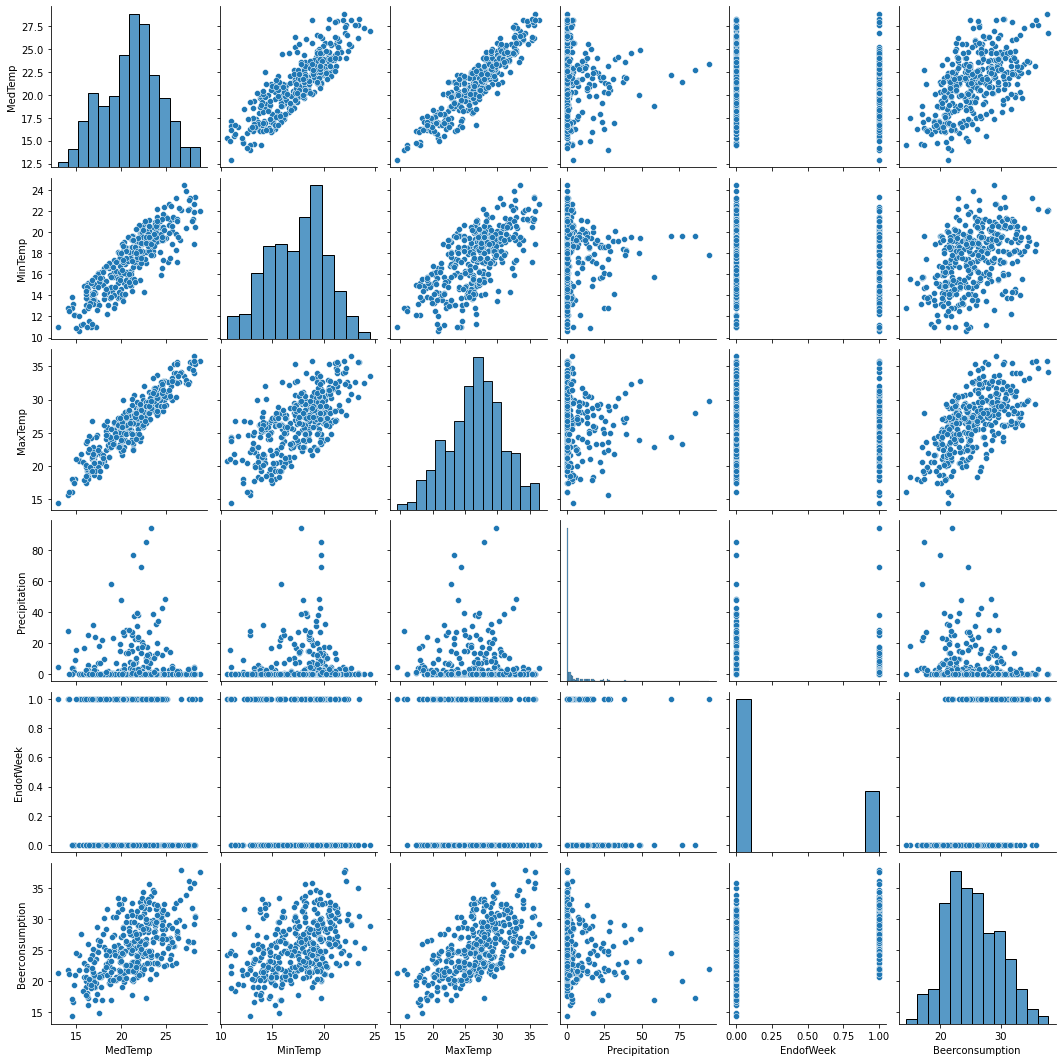

In [11]:
sns.pairplot(df_beer1)

In [12]:
corrmat = df_beer1.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [20]:
#X=df_beer.iloc[:,0:-1]
#y=df_beer.iloc[:,-1]

X=df_beer1.drop(['Beerconsumption'],axis=1)
y=df_beer1['Beerconsumption']

In [21]:
print(X.shape)
print(y.shape)

(365, 5)
(365,)


In [22]:
## Creating a Random Forest Model
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [23]:
## Fitting the Model with Default Hyperparameters

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Running the random forest with default parameters.
rfr = RandomForestRegressor()

In [25]:
X_train.head()

MedTemp  MinTemp  MaxTemp  Precipitation  EndofWeek
12     25.52     21.2     34.8            0.8          0
353    22.84     19.6     29.0            8.4          1
147    18.56     16.8     23.2            1.8          0
16     28.86     22.0     35.8            0.0          1
86     23.28     19.1     29.5            0.0          1

In [26]:
y_train.head()

MedTemp  MinTemp  MaxTemp  Precipitation  EndofWeek
317    25.06     19.5     30.4           16.4          1
95     21.36     18.5     27.7            0.0          0
210    16.76     11.3     26.7            0.0          0
189    17.54     15.3     20.4            0.0          0
306    21.86     19.5     25.6            3.4          0